#   Oasis InfoByte 
##  Data Science Intership - Task 1
### Samarth Pandey

## Iris Flower Classification
#### Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements. Now assume that you have the measurements of the iris flowers according to their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from warnings import filterwarnings
filterwarnings(action='ignore')

## Exploratory Data Analysis

In [2]:
iris=pd.read_csv("Iris.csv")
print(iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
print(iris.shape)

(150, 6)


In [4]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [5]:
#Checking for null values
print(iris.isna().sum())
print(iris.describe())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [6]:
n = len(iris[iris['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [7]:
n1 = len(iris[iris['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)

No of Virginica in Dataset: 50


In [8]:
n2 = len(iris[iris['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 50


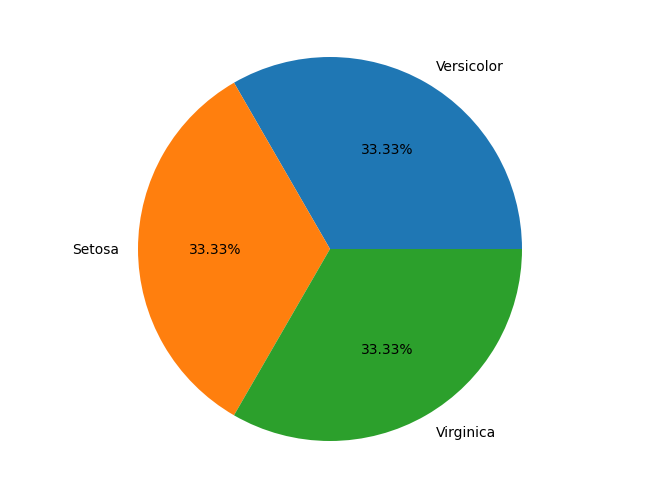

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [n,n1,n2]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

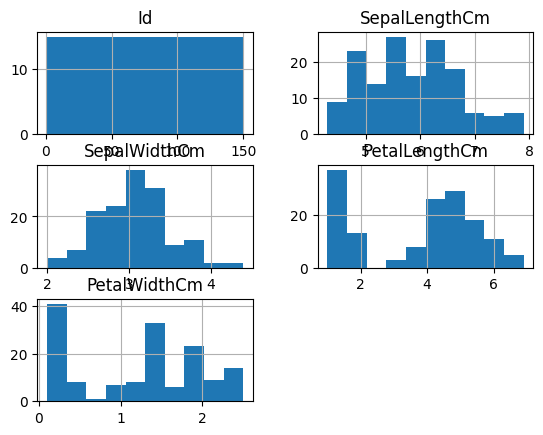

In [10]:
iris.hist()
plt.show()

## Splitting Labels and Features

In [11]:
X = iris['SepalLengthCm'].values.reshape(-1,1)
print(X)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [12]:
Y = iris['SepalWidthCm'].values.reshape(-1,1)
print(Y)

[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]
 [3.9]
 [3.4]
 [3.4]
 [2.9]
 [3.1]
 [3.7]
 [3.4]
 [3. ]
 [3. ]
 [4. ]
 [4.4]
 [3.9]
 [3.5]
 [3.8]
 [3.8]
 [3.4]
 [3.7]
 [3.6]
 [3.3]
 [3.4]
 [3. ]
 [3.4]
 [3.5]
 [3.4]
 [3.2]
 [3.1]
 [3.4]
 [4.1]
 [4.2]
 [3.1]
 [3.2]
 [3.5]
 [3.1]
 [3. ]
 [3.4]
 [3.5]
 [2.3]
 [3.2]
 [3.5]
 [3.8]
 [3. ]
 [3.8]
 [3.2]
 [3.7]
 [3.3]
 [3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]
 [2.8]
 [3.3]
 [2.4]
 [2.9]
 [2.7]
 [2. ]
 [3. ]
 [2.2]
 [2.9]
 [2.9]
 [3.1]
 [3. ]
 [2.7]
 [2.2]
 [2.5]
 [3.2]
 [2.8]
 [2.5]
 [2.8]
 [2.9]
 [3. ]
 [2.8]
 [3. ]
 [2.9]
 [2.6]
 [2.4]
 [2.4]
 [2.7]
 [2.7]
 [3. ]
 [3.4]
 [3.1]
 [2.3]
 [3. ]
 [2.5]
 [2.6]
 [3. ]
 [2.6]
 [2.3]
 [2.7]
 [3. ]
 [2.9]
 [2.9]
 [2.5]
 [2.8]
 [3.3]
 [2.7]
 [3. ]
 [2.9]
 [3. ]
 [3. ]
 [2.5]
 [2.9]
 [2.5]
 [3.6]
 [3.2]
 [2.7]
 [3. ]
 [2.5]
 [2.8]
 [3.2]
 [3. ]
 [3.8]
 [2.6]
 [2.2]
 [3.2]
 [2.8]
 [2.8]
 [2.7]
 [3.3]
 [3.2]
 [2.8]
 [3. ]
 [2.8]
 [3. ]
 [2.8]
 [3.8]
 [2.8]
 [2.8]
 [2.6]
 [3. ]
 [3.4]
 [3.1]
 [3. ]
 [3.1]
 [3.1]
 [3.1]
 [2.7]

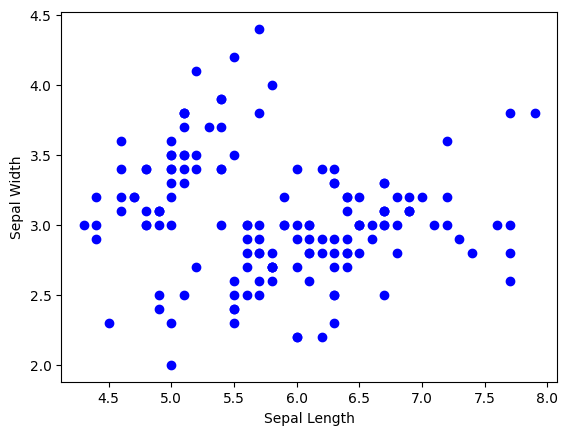

In [13]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='b')
plt.show()

In [14]:
#Correlation 
corr_mat = iris.corr()
print(corr_mat)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


In [15]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

## Train and Test split

In [16]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [17]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [18]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
15,5.7,4.4,1.5,0.4
124,6.7,3.3,5.7,2.1
80,5.5,2.4,3.8,1.1
25,5.0,3.0,1.6,0.2
136,6.3,3.4,5.6,2.4


In [19]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
34,4.9,3.1,1.5,0.1
84,5.4,3.0,4.5,1.5
39,5.1,3.4,1.5,0.2
97,6.2,2.9,4.3,1.3
20,5.4,3.4,1.7,0.2


In [20]:
train_y.head()

15         Iris-setosa
124     Iris-virginica
80     Iris-versicolor
25         Iris-setosa
136     Iris-virginica
Name: Species, dtype: object

In [21]:
test_y.head()

34        Iris-setosa
84    Iris-versicolor
39        Iris-setosa
97    Iris-versicolor
20        Iris-setosa
Name: Species, dtype: object

## Comparing Different Algorithms to get Accurate results 

In [22]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.9736842105263158


In [23]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[ 9  0  0]
 [ 0 15  1]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        38
      macro avg       0.98      0.98      0.98        38
   weighted avg       0.98      0.97      0.97        38



In [24]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 0.9473684210526315


In [25]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9210526315789473


In [26]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.9473684210526315


In [27]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.9473684210526315


In [28]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.947,0.947,0.947,0.947,0.921]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.947,Logistic Regression
0.947,Support Vector Machines
0.947,Naive Bayes
0.947,KNN
0.921,Decision Tree


## KNN algorithm to Predict the Species.

In [29]:
sl=float(input("Enter Value For Sepal Length - "))
sw=float(input("Enter Value For Sepal Width - "))
pl=float(input("Enter Value For Petal Length - "))
pw=float(input("Enter Value For Petal Width - "))
x_new = np.array([[sl,sw,pl,pw]])
prediction = model2.predict(x_new)
print("Prediction: {}".format(prediction))

Enter Value For Sepal Length - 5
Enter Value For Sepal Width - 2.9
Enter Value For Petal Length - 1
Enter Value For Petal Width - 0.9
Prediction: ['Iris-setosa']


## Thank You 😃